<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import catboost as cb
import xgboost

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
data.describe(include = "all")

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,4978,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,9,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,NaN,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,NaN,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]


feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Проверка пропусков

In [7]:
# YOUR CODE
data.isna().sum().sort_values(ascending=False)

ClientPeriod                0
MonthlySpending             0
PaymentMethod               0
IsBillingPaperless          0
HasContractPhone            0
HasMovieSubscription        0
HasOnlineTV                 0
HasTechSupportAccess        0
HasDeviceProtection         0
HasOnlineBackup             0
HasOnlineSecurityService    0
HasInternetService          0
HasMultiplePhoneNumbers     0
HasPhoneService             0
HasChild                    0
HasPartner                  0
IsSeniorCitizen             0
Sex                         0
TotalSpent                  0
Churn                       0
dtype: int64

## Удаление дубликатов

In [8]:
data[data.duplicated()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1384,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1959,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
2036,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2586,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
2877,1,70.10,70.1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2991,1,20.90,20.9,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3660,1,20.45,20.45,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3749,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [9]:
len(data[data.duplicated()])

14

In [10]:
data[(data.TotalSpent == '69.9') & (data.HasPartner == 'No')]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
170,1,69.9,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1384,1,69.9,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [11]:
data = data.drop_duplicates()
data.shape

(5268, 20)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Работа с выбросами

### Признак ClientPeriod

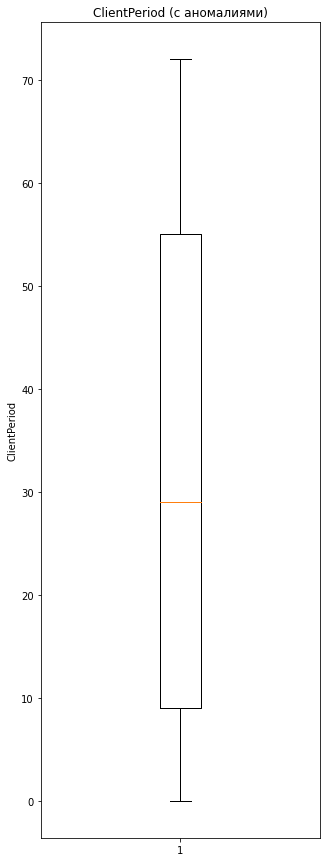

In [12]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(data.ClientPeriod)
ax.set_ylabel('ClientPeriod')
ax.set_title('ClientPeriod (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [13]:
data.ClientPeriod.describe()

count    5268.000000
mean       32.480448
std        24.529439
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: ClientPeriod, dtype: float64

In [14]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [15]:
boundaries = calculate_outliers(data.ClientPeriod)
boundaries

(-60.0, 124.0)

### Выбросов в столбце ClientPeriod нет

### Признак MonthlySpending

In [16]:
data.MonthlySpending.describe()

count    5268.000000
mean       64.977563
std        30.176025
min        18.250000
25%        35.537500
50%        70.450000
75%        90.050000
max       118.750000
Name: MonthlySpending, dtype: float64

In [17]:
data.MonthlySpending.value_counts()

20.05    45
19.65    34
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: MonthlySpending, Length: 1468, dtype: int64

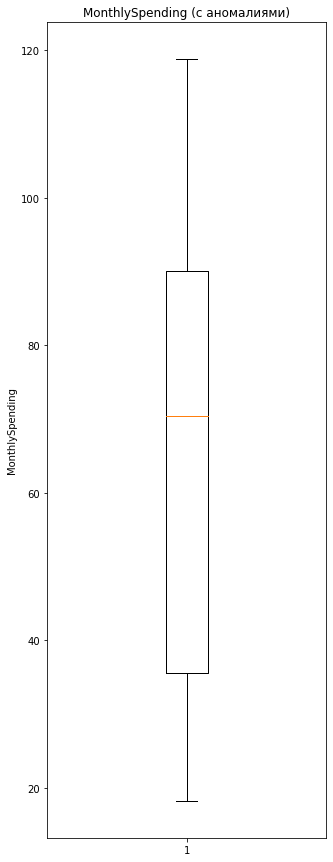

In [18]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(data.MonthlySpending)
ax.set_ylabel('MonthlySpending')
ax.set_title('MonthlySpending (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [19]:
boundaries = calculate_outliers(data.MonthlySpending)
boundaries

(-46.23125000000002, 171.81875000000002)

### Выбросов в столбце MonthlySpending нет

### Признак TotalSpent

In [20]:
data['TotalSpent'].value_counts()

          9
19.75     8
20.2      7
20.05     5
19.9      5
         ..
950.2     1
4264      1
24.25     1
1090.6    1
1375.6    1
Name: TotalSpent, Length: 4978, dtype: int64

In [21]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data.isna().sum().sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_8064\2606117933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')


TotalSpent                  9
ClientPeriod                0
HasOnlineBackup             0
PaymentMethod               0
IsBillingPaperless          0
HasContractPhone            0
HasMovieSubscription        0
HasOnlineTV                 0
HasTechSupportAccess        0
HasDeviceProtection         0
HasOnlineSecurityService    0
MonthlySpending             0
HasInternetService          0
HasMultiplePhoneNumbers     0
HasPhoneService             0
HasChild                    0
HasPartner                  0
IsSeniorCitizen             0
Sex                         0
Churn                       0
dtype: int64

In [22]:
data = data[~(data.TotalSpent.isna())]
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [24]:
data.shape

(5259, 20)

In [25]:
data['TotalSpent']=data['TotalSpent'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_8064\2823486826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpent']=data['TotalSpent'].astype(float)


In [26]:
boundaries = calculate_outliers(data.TotalSpent)
boundaries

(-4715.5, 8935.9)

In [27]:
is_outlier = (data.TotalSpent > boundaries[1]) 
is_outlier.sum()

0

In [28]:
data.TotalSpent.describe()

count    5259.000000
mean     2297.370441
std      2269.066122
min        18.800000
25%       403.775000
50%      1415.000000
75%      3816.625000
max      8684.800000
Name: TotalSpent, dtype: float64

### Выбросов в столбце TotalSpent нет

In [29]:
data.Churn.value_counts(normalize = True)

0    0.738734
1    0.261266
Name: Churn, dtype: float64

In [30]:
data.Churn.value_counts()[0]/data.Churn.value_counts()[1]

2.8275109170305677

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [31]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\User\AppData\Local\Temp\ipykernel_8064\286891049.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.21,0.19
TotalSpent,0.83,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.21,0.09,1.00,0.16
Churn,-0.35,0.19,-0.20,0.16,1.00


In [32]:
data['TotalSpent'].values

array([1026.35, 1872.2 ,   75.9 , ...,   55.05, 2215.25, 1375.6 ])

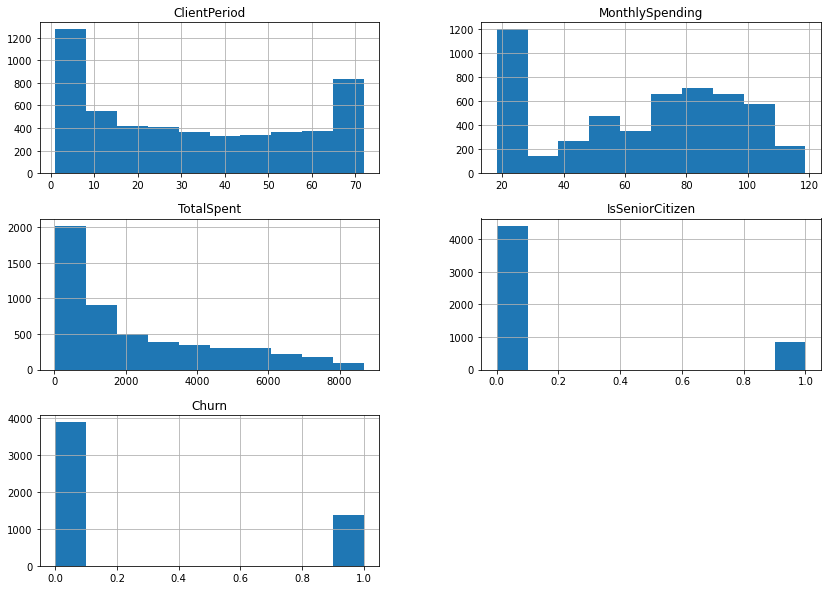

In [33]:
data.hist(column=data.columns, figsize=(14, 10))
None

In [34]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [35]:
data[cat_cols].apply(pd.Series.value_counts)

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,NaN,4418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bank transfer (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1157.0
Credit card (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142.0
DSL,NaN,NaN,NaN,NaN,NaN,NaN,1793.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electronic check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1780.0
Female,2616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,2335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mailed check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1180.0
Male,2643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


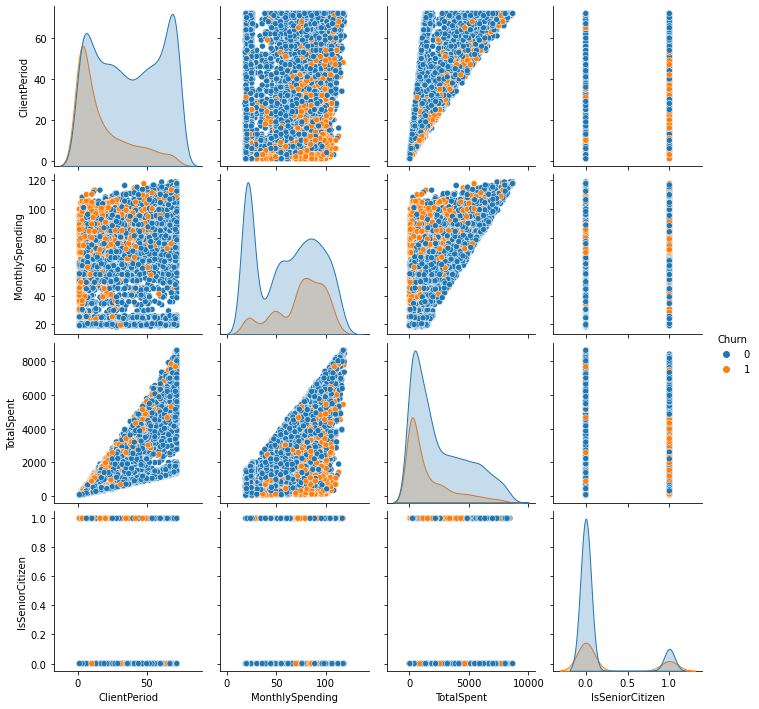

In [36]:
import seaborn as sns
sns.pairplot(data, hue='Churn')

plt.show()

Всего категориальных признаков 16

Male      2643
Female    2616
Name: Sex, dtype: int64

0    4418
1     841
Name: IsSeniorCitizen, dtype: int64

No     2690
Yes    2569
Name: HasPartner, dtype: int64

No     3662
Yes    1597
Name: HasChild, dtype: int64

Yes    4740
No      519
Name: HasPhoneService, dtype: int64

No                  2494
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2335
DSL            1793
No             1131
Name: HasInternetService, dtype: int64

No                     2603
Yes                    1525
No internet service    1131
Name: HasOnlineSecurityService, dtype: int64

No                     2323
Yes                    1805
No internet service    1131
Name: HasOnlineBackup, dtype: int64

No                     2308
Yes                    1820
No internet service    1131
Name: HasDeviceProtection, dtype: int64

No                     2595
Yes                    1533
No internet service    1131
Na

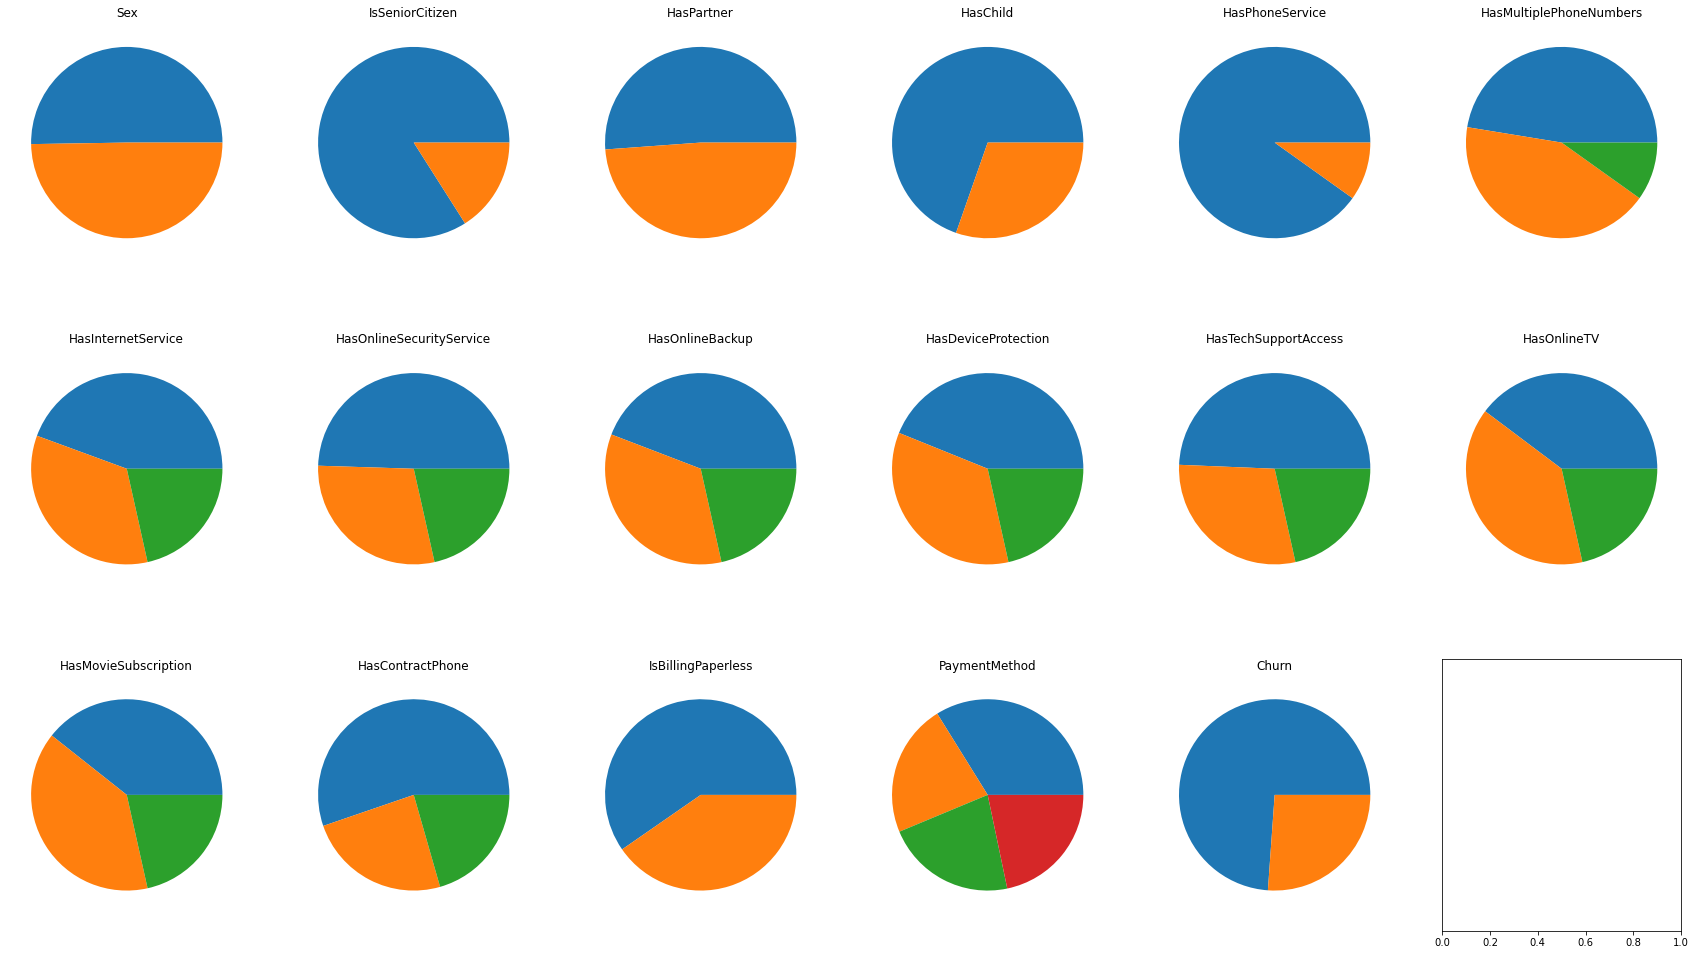

In [37]:
print("Всего категориальных признаков", len(cat_cols))
print()
n = 6
f, p = plt.subplots((len(cat_cols) // n)+1, n, sharey=True, figsize=(30, 17))

for i, col in enumerate(cat_cols+[target_col]):    
    print(data[col].value_counts())
    print()
    p[i//n, i%n].pie(data[col].value_counts())
    p[i//n, i%n].set_title(col)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [38]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
import catboost as cb
import xgboost

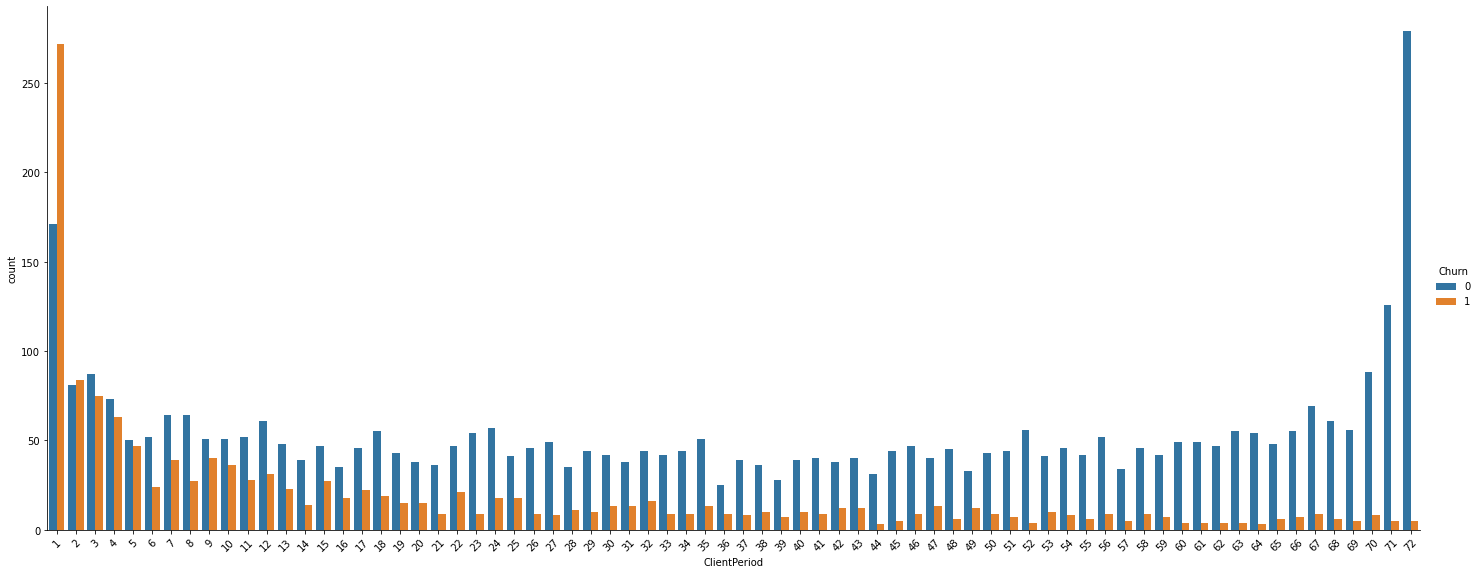

In [40]:
sns.catplot(data=data, x="ClientPeriod", hue="Churn", kind="count", height=8, aspect=20/8)
plt.xticks(rotation=45);

## Catboost без категорирования

In [41]:
df1 = data.copy()

In [42]:
##data.loc[data['ClientPeriod'].isin([1, 2, 3, 4]) == False, 'ClientPeriod'] = 0
##data.loc[data['ClientPeriod'].isin([1, 2, 3, 4]) == True, 'ClientPeriod'] = 1

In [43]:
df1.loc[df1['HasOnlineSecurityService'].isin(["Yes"]) == False, 'HasOnlineSecurityService'] = 0
df1.loc[df1['HasOnlineSecurityService'].isin(["Yes"]) == True, 'HasOnlineSecurityService'] = 1
df1.loc[df1['HasOnlineBackup'].isin(["Yes"]) == False, 'HasOnlineBackup'] = 0
df1.loc[df1['HasOnlineBackup'].isin(["Yes"]) == True, 'HasOnlineBackup'] = 1
df1.HasOnlineSecurityService = df1.HasOnlineSecurityService.astype(int)
df1.HasOnlineBackup = df1.HasOnlineBackup.astype(int)
df1["Internet"] = df1["HasOnlineBackup"] + df1["HasOnlineSecurityService"]
df1["Internet"].value_counts()

0    2777
1    1634
2     848
Name: Internet, dtype: int64

In [44]:
df1.loc[df1['HasPhoneService'].isin(["Yes"]) == False, 'HasPhoneService'] = 0
df1.loc[df1['HasPhoneService'].isin(["Yes"]) == True, 'HasPhoneService'] = 1
df1.loc[df1['HasTechSupportAccess'].isin(["Yes"]) == False, 'HasTechSupportAccess'] = 0
df1.loc[df1['HasTechSupportAccess'].isin(["Yes"]) == True, 'HasTechSupportAccess'] = 1
df1.HasPhoneService = df1.HasPhoneService.astype(int)
df1.HasTechSupportAccess = df1.HasTechSupportAccess.astype(int)

In [45]:
df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\User\AppData\Local\Temp\ipykernel_8064\3724681857.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPhoneService,HasOnlineSecurityService,HasOnlineBackup,HasTechSupportAccess,Churn,Internet
ClientPeriod,1.00,0.25,0.83,0.01,0.01,0.34,0.36,0.32,-0.35,0.44
MonthlySpending,0.25,1.00,0.65,0.21,0.25,0.29,0.44,0.33,0.19,0.46
TotalSpent,0.83,0.65,1.00,0.09,0.12,0.42,0.51,0.43,-0.20,0.58
IsSeniorCitizen,0.01,0.21,0.09,1.00,0.01,-0.04,0.07,-0.05,0.16,0.02
HasPhoneService,0.01,0.25,0.12,0.01,1.00,-0.10,-0.04,-0.10,0.01,-0.09
HasOnlineSecurityService,0.34,0.29,0.42,-0.04,-0.10,1.00,0.29,0.35,-0.18,0.79
HasOnlineBackup,0.36,0.44,0.51,0.07,-0.04,0.29,1.00,0.29,-0.09,0.81
HasTechSupportAccess,0.32,0.33,0.43,-0.05,-0.10,0.35,0.29,1.00,-0.16,0.40
Churn,-0.35,0.19,-0.20,0.16,0.01,-0.18,-0.09,-0.16,1.00,-0.17
Internet,0.44,0.46,0.58,0.02,-0.09,0.79,0.81,0.40,-0.17,1.00


In [46]:
df1.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn',
       'Internet'],
      dtype='object')

In [47]:
columns_fordrop = ['IsBillingPaperless', 'PaymentMethod', 'HasMovieSubscription', 
'HasOnlineTV',  'HasDeviceProtection',  'HasMultiplePhoneNumbers', 
'HasChild', 'HasPartner', 'IsSeniorCitizen', 'Sex', 'HasOnlineSecurityService',
'HasOnlineBackup'] 
df1 = df1.drop(columns=columns_fordrop) 
df1

,ClientPeriod,MonthlySpending,TotalSpent,HasPhoneService,HasInternetService,HasTechSupportAccess,HasContractPhone,Churn,Internet
0,55,19.50,1026.35,1,No,0,One year,0,0
1,72,25.85,1872.20,1,No,0,Two year,0,0
2,1,75.90,75.90,1,Fiber optic,1,Month-to-month,1,0
3,32,79.30,2570.00,1,Fiber optic,0,Month-to-month,0,0
4,60,115.25,6758.45,1,Fiber optic,1,Two year,0,2
...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,DSL,1,Month-to-month,0,0
5278,50,44.45,2188.45,0,DSL,1,One year,0,1
5279,1,55.05,55.05,1,DSL,1,Month-to-month,0,0
5280,29,76.00,2215.25,1,Fiber optic,0,Month-to-month,0,0


In [48]:
cat_cols = [
    'HasInternetService',
    'HasContractPhone'   
]

In [53]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


AUC: 0.851


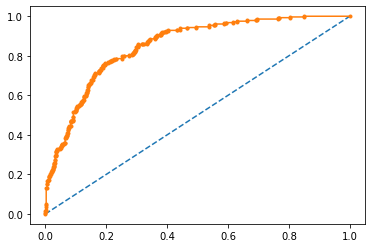

In [54]:
clf_cb_best = cb.CatBoostClassifier(logging_level='Silent', depth= 3, iterations= 300)
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=1)
clf_cb_best.fit(X_train, y_train, cat_features=cat_cols, use_best_model = True)
predict_2 = clf_cb_best.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test,predict_2) 
print("AUC: %.3f" % auc)
fpr, tpr, thresholds = roc_curve(y_test, predict_2)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.show()